The following is multiple maps of the distribution of demosponges versus hexactinellids.

In [2]:
#Imports for statistical analysis and database management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Imports for mapping
import xarray as xr
import cartopy.crs as ccrs
from maptools import make_map

In [4]:
#import needed to use sediment dataset
import netCDF4 as nc4

The data used here comes from the GPlatesPortal Seafloor Lithology Map (https://portal.gplates.org/portal/seafloor/).

In [5]:
df=pd.read_csv('deep_sea_coral_sponge_data.csv')

C:\Users\Sam She\AppData\Local\Temp\ipykernel_36372\2917557790.py:1: DtypeWarning: Columns (5,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('deep_sea_coral_sponge_data.csv')


In [6]:
#seperate sponges based on higher clade
demo_df=df[df.VernacularNameCategory=='demosponge']
glass_df=df[df.VernacularNameCategory=='glass sponge']

The data used here comes from the GPlatesPortal Seafloor Lithology Map (https://portal.gplates.org/portal/seafloor/).

In [7]:
ds = nc4.Dataset('seabed_lithology_v1.nc')

In [8]:
#Code needed to prepare dataset for use and size of dataset.
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
z=ds.variables['z'][:,:]

ds.close()

In [9]:
#Nan values removed from dataframe's z, where the sediment data type is stored.
z_no_nan=np.copy(z) #A copy of the z array was created.
z_no_nan=z_no_nan.ravel() #since z array is 2d, it was raveled for editing.
z_no_nan[~np.abs(z_no_nan)>20]=0 #A hightly negative value was used as the nan value, so any extreme values were replaced with 0.
z_no_nan=np.reshape(z_no_nan,np.shape(z)) #The raveled z array was returned to a 2d array

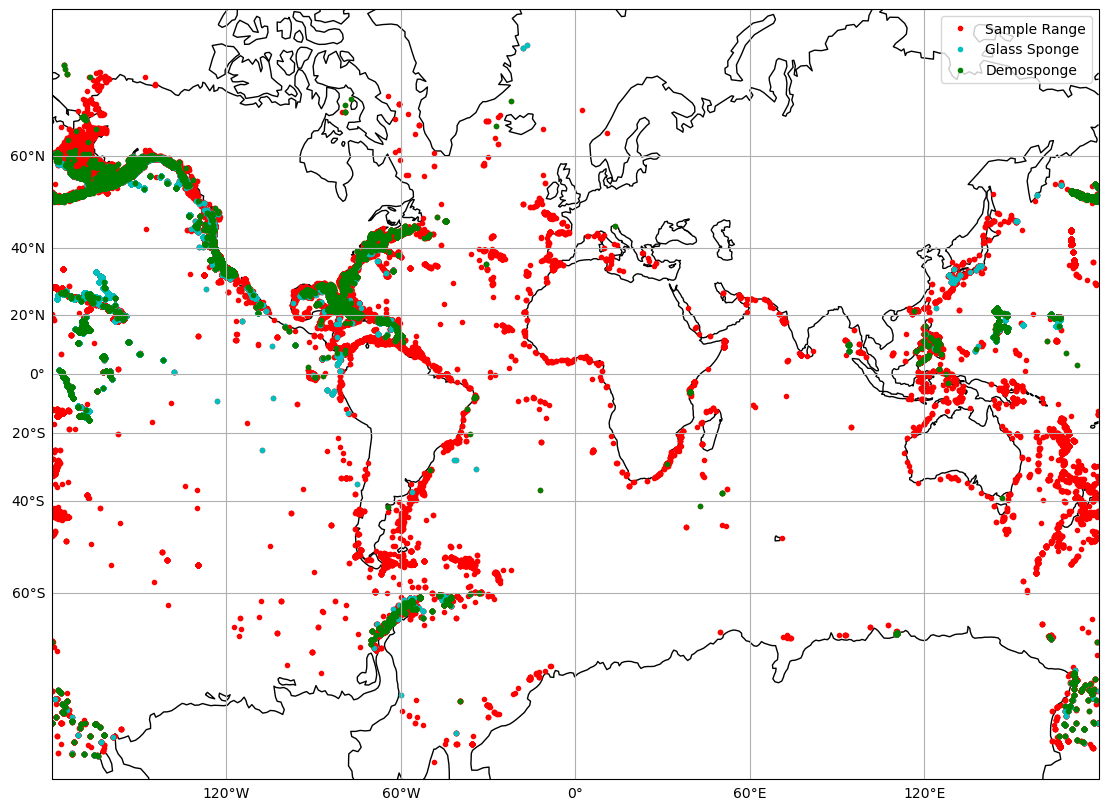

In [24]:
#create figure
plt.figure(figsize=(10*1.65,10))
#create map
ax=make_map(projection=ccrs.Mercator())
ax.coastlines() #add coastlines
plt.plot(df.longitude,df.latitude,'.',color='r',label='Sample Range',transform=ccrs.PlateCarree()) #add overall sample
plt.plot(glass_df.longitude,glass_df.latitude,'.',color='c',label='Glass Sponge',transform=ccrs.PlateCarree()) #add hexactinellids
plt.plot(demo_df.longitude,demo_df.latitude,'.',color='g',label='Demosponge',transform=ccrs.PlateCarree()) #add demosponges

plt.legend()

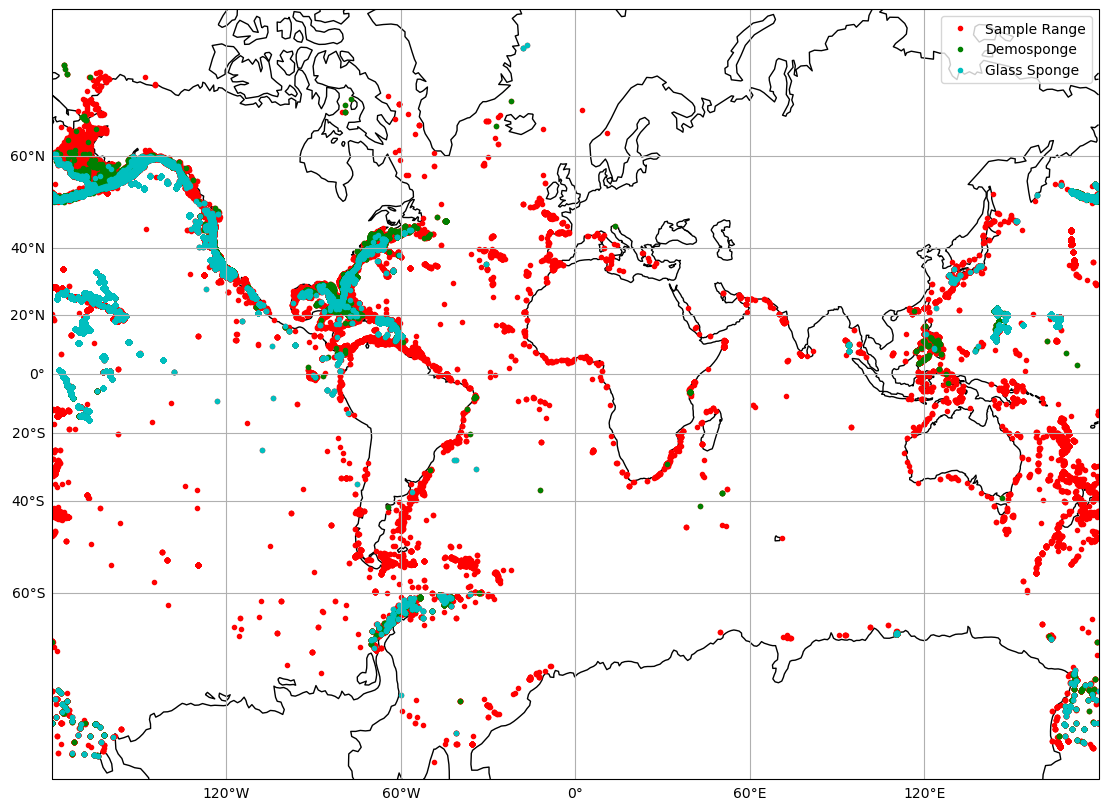

In [25]:
#create figure
plt.figure(figsize=(10*1.65,10))
#create map
ax=make_map(projection=ccrs.Mercator())
ax.coastlines() #add coastlines
plt.plot(df.longitude,df.latitude,'.',color='r',label='Sample Range',transform=ccrs.PlateCarree()) #add overall sample
plt.plot(demo_df.longitude,demo_df.latitude,'.',color='g',label='Demosponge',transform=ccrs.PlateCarree()) #add demosponges
plt.plot(glass_df.longitude,glass_df.latitude,'.',color='c',label='Glass Sponge',transform=ccrs.PlateCarree()) #add hexactinellids

plt.legend()

The above is two maps of the world, where red is the overall sampling, blue is hexactinellids, and green is demosponges. The first has demosponges overlapping hexactinellids, and the second has hexactinellids overlapping demosponges, so that both are visible by referencing both graphs.

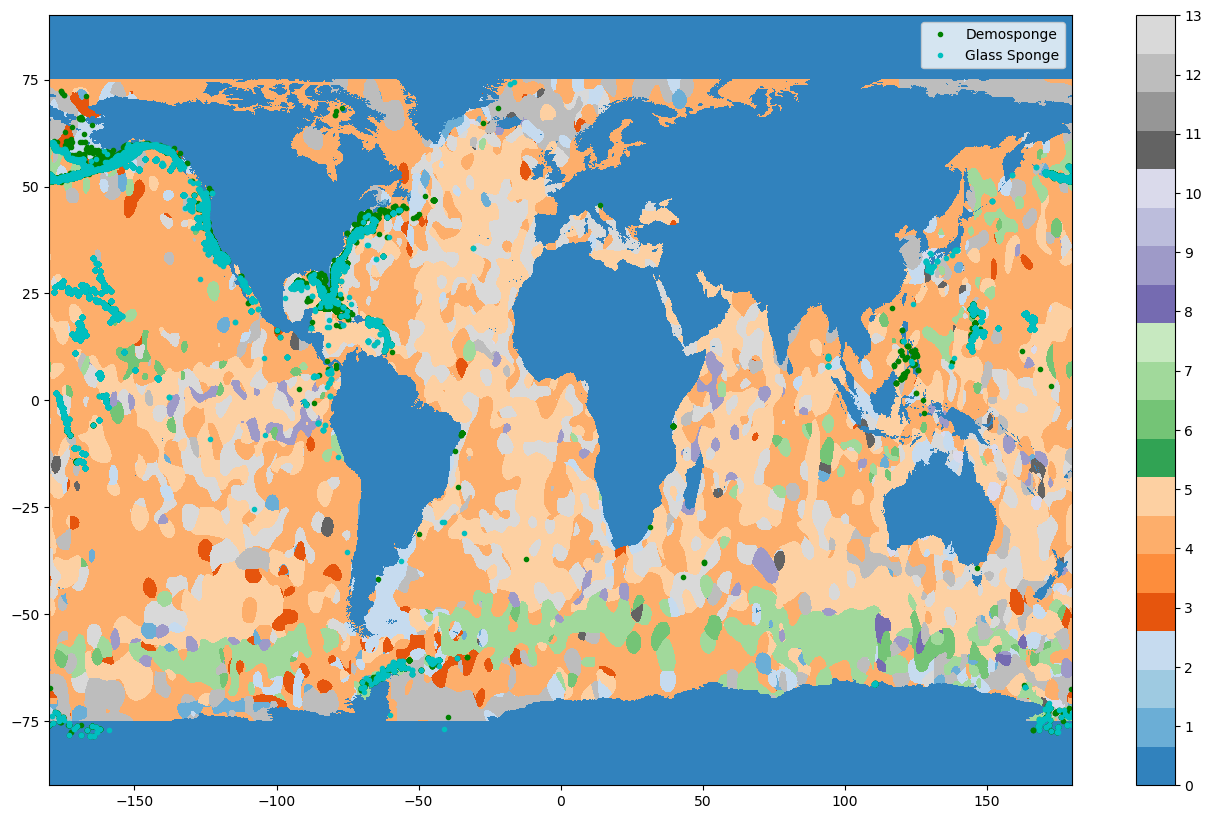

In [10]:
#Mapping of sediment types from data
plt.figure(figsize=(10*1.65,10))
plt.pcolormesh(lon,lat,z_no_nan,cmap='tab20c')
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]) #ticks manually added due to known number of values.

plt.plot(demo_df.longitude,demo_df.latitude,'.',color='g',label='Demosponge') #add demosponges
plt.plot(glass_df.longitude,glass_df.latitude,'.',color='c',label='Glass Sponge') #add hexactinellids

plt.legend()

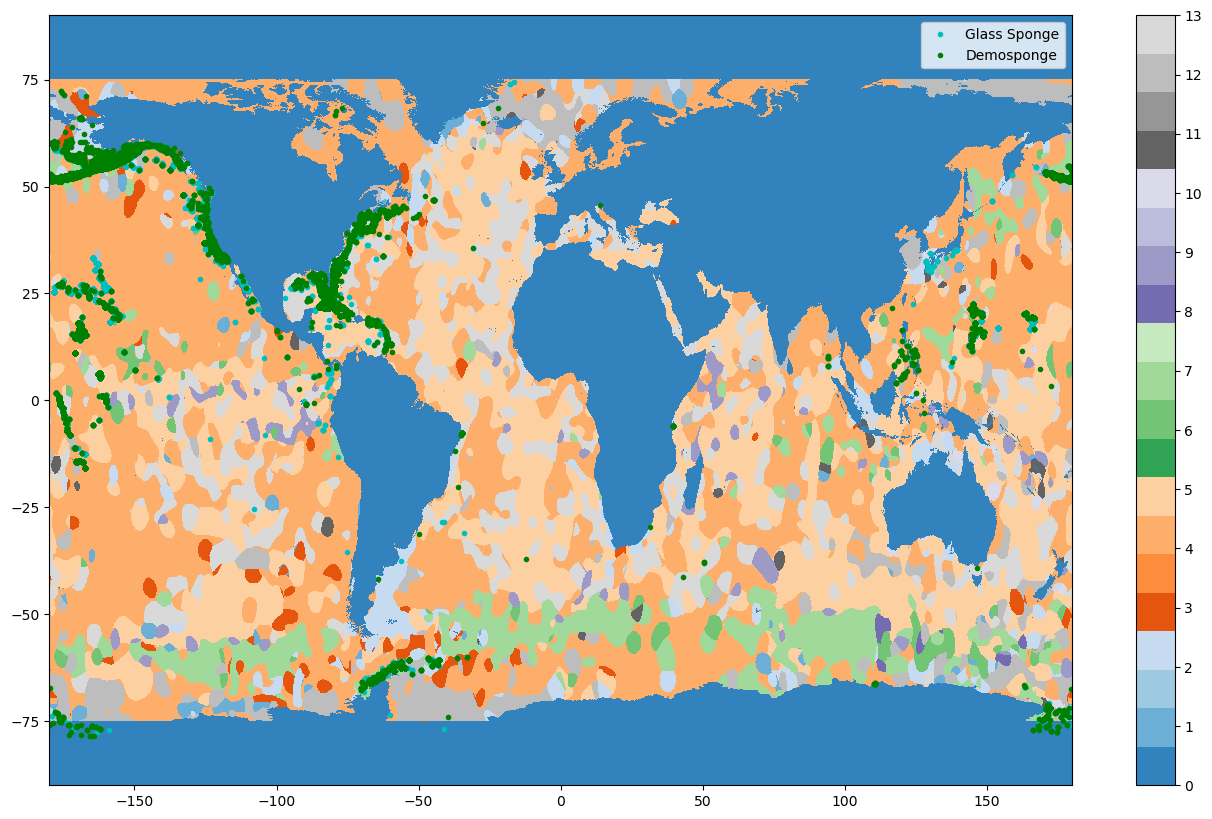

In [11]:
#Mapping of sediment types from data
plt.figure(figsize=(10*1.65,10))
plt.pcolormesh(lon,lat,z_no_nan,cmap='tab20c')
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]) #ticks manually added due to known number of values.

plt.plot(glass_df.longitude,glass_df.latitude,'.',color='c',label='Glass Sponge') #add hexactinellids
plt.plot(demo_df.longitude,demo_df.latitude,'.',color='g',label='Demosponge') #add demosponges

plt.legend()

The above is two maps of the world with the same points as the first maps, but without the overall sampling, and with color coded seafloor lithology.

The following is a key for the lithology.


0:'No Data'      1:'Gravel and coarser'      2:'Sand'      3:'Silt'      4:'Clay'


5:'Calcareous Ooze'      6:'Radiolarian Ooze'      7:'Diatom Ooze'      8:'Sponge Spicules'

9:'Mixed Calcareous-Siliceous Ooze'      10:'Shells and Coral Fragments'


11:'Ash and Volcanic Sand/Gravel'      12:'Fine-Grained Calcareous Sediment'      13:'Siliceous Mud'